## Arbol de desicion Carros


## Diego Fernando Salazar

In [1]:
## Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
##cargar dataset
data = pd.read_csv('Car details v3.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
data.shape

(8128, 13)

In [4]:
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [5]:
data.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
data = data.dropna(subset=['mileage', 'engine', 'max_power', 'torque', 'seats'])

In [7]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

(array([7.098e+03, 4.520e+02, 1.270e+02, 9.900e+01, 1.300e+01, 1.130e+02,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([   29999. ,  1026999.1,  2023999.2,  3020999.3,  4017999.4,
         5014999.5,  6011999.6,  7008999.7,  8005999.8,  9002999.9,
        10000000. ]),
 <BarContainer object of 10 artists>)

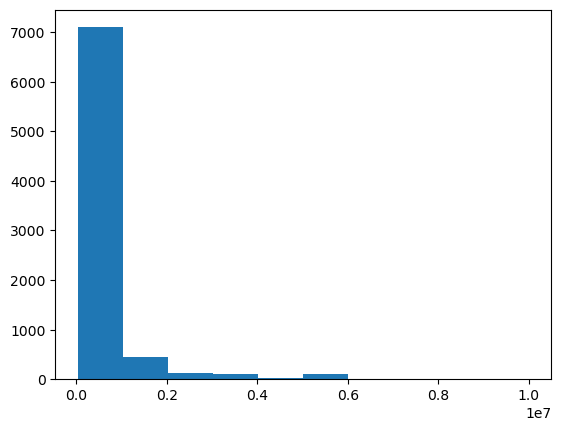

In [8]:
plt.hist(data.selling_price)

<Axes: xlabel='km_driven', ylabel='selling_price'>

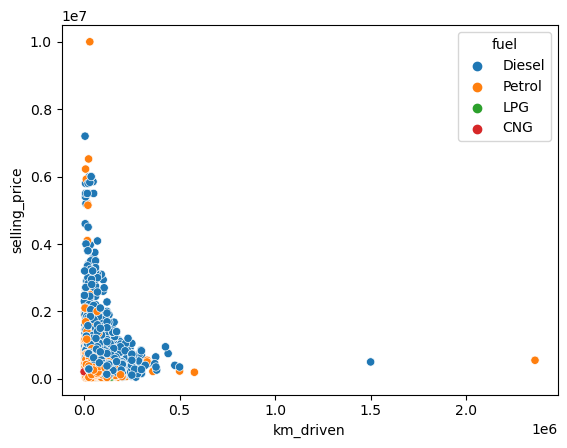

In [9]:
sns.scatterplot(x="km_driven", y="selling_price", hue="fuel", data=data)

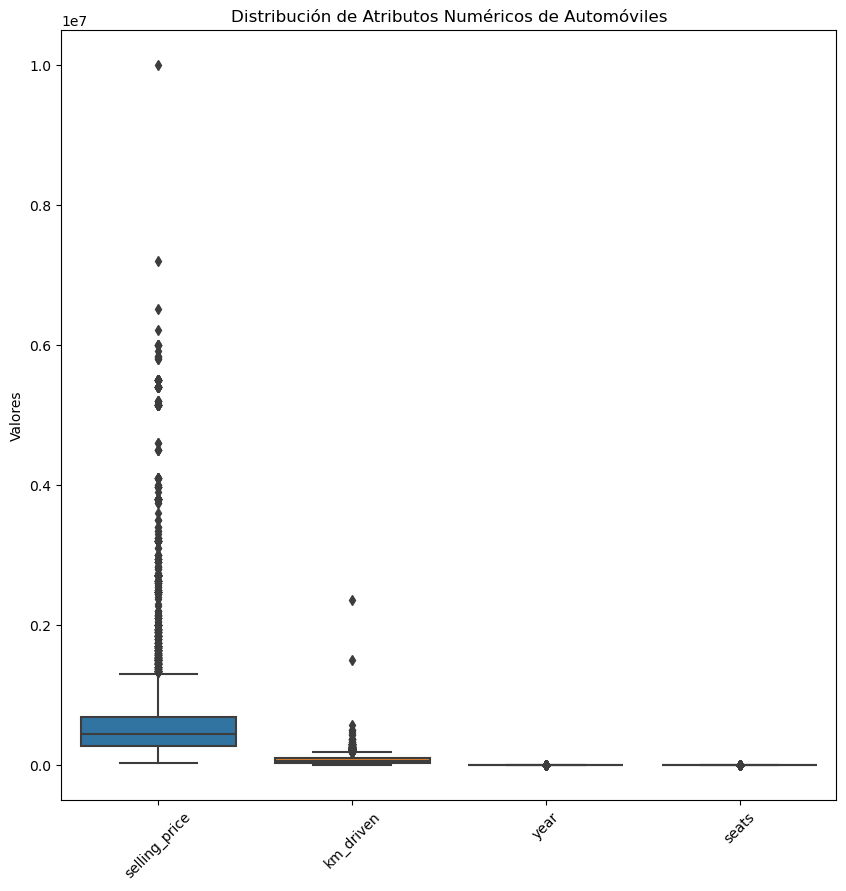

In [10]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=data[["selling_price", "km_driven", "year", "seats"]])
plt.xticks(rotation=45)
plt.title("Distribución de Atributos Numéricos de Automóviles")
plt.ylabel("Valores")
plt.show()


In [11]:
predictors_col = ["year", "km_driven", "mileage", "engine", "max_power", "seats"]
target_col = "selling_price"

In [12]:
predictors = data[predictors_col]
target = data[target_col]

In [13]:
predictors

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,120000,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,140000,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,127000,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,120000,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...
8123,2013,110000,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,2007,119000,16.8 kmpl,1493 CC,110 bhp,5.0
8125,2009,120000,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,2013,25000,23.57 kmpl,1396 CC,70 bhp,5.0


In [19]:
target

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7906, dtype: int64

(array([7.098e+03, 4.520e+02, 1.270e+02, 9.900e+01, 1.300e+01, 1.130e+02,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([   29999. ,  1026999.1,  2023999.2,  3020999.3,  4017999.4,
         5014999.5,  6011999.6,  7008999.7,  8005999.8,  9002999.9,
        10000000. ]),
 <BarContainer object of 10 artists>)

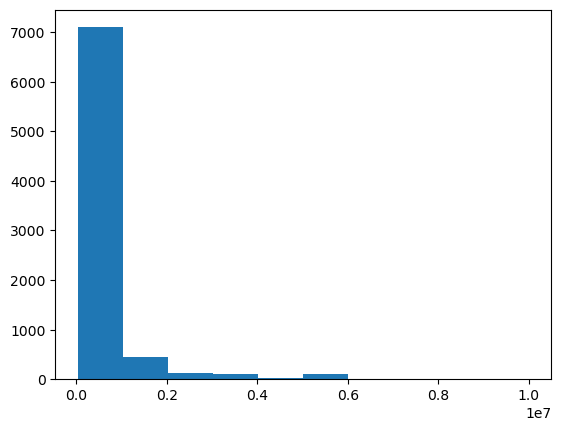

In [21]:
plt.hist(data.selling_price)

<Axes: xlabel='fuel', ylabel='selling_price'>

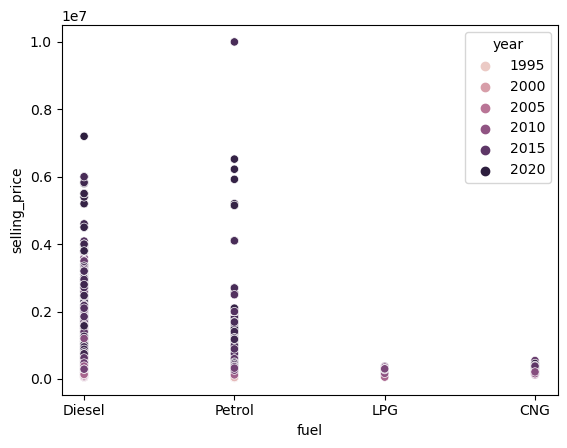

In [23]:
sns.scatterplot(x = "fuel", y = "selling_price", hue = "year", data = data)

<function matplotlib.pyplot.show(close=None, block=None)>

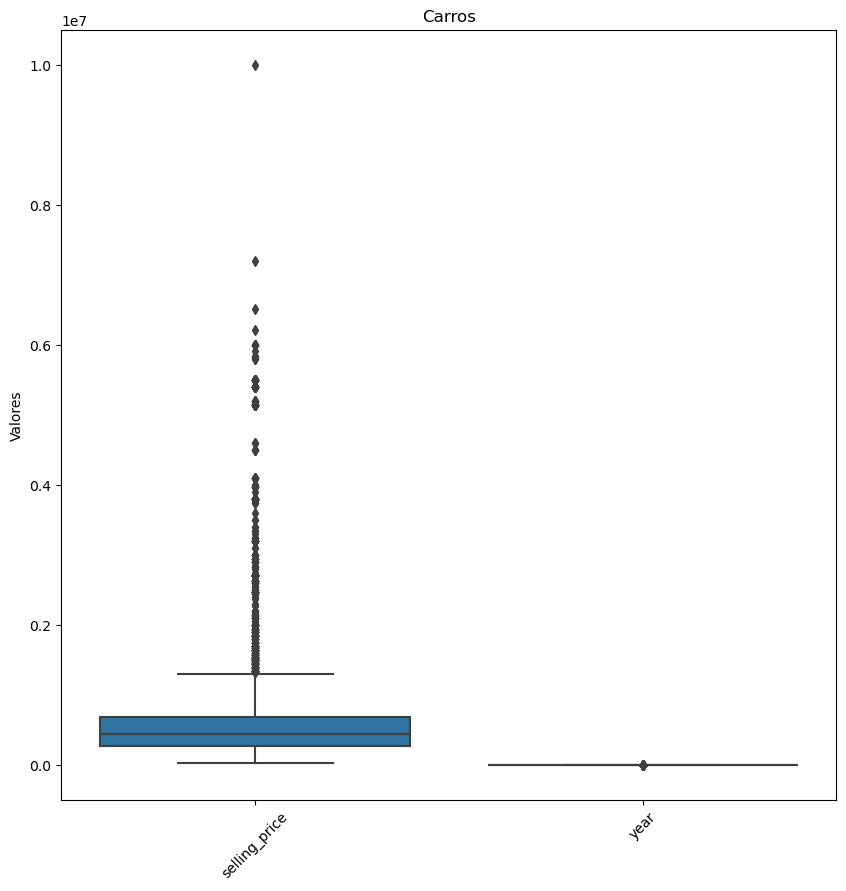

In [24]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=data[["fuel", "selling_price", "year"]])
plt.xticks(rotation=45)
plt.title("Carros")
plt.ylabel("Valores")
plt.show

In [40]:
predictors_col = ["year", "km_driven", "seats"]
target_col = "selling_price"

In [41]:
predictors = data[predictors_col]
target = data[target_col]

In [42]:
predictors

,year,km_driven,seats
0,2014,145500,5.0
1,2014,120000,5.0
2,2006,140000,5.0
3,2010,127000,5.0
4,2007,120000,5.0
...,...,...,...
8123,2013,110000,5.0
8124,2007,119000,5.0
8125,2009,120000,5.0
8126,2013,25000,5.0


In [43]:
target

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7906, dtype: int64

In [44]:
corr = predictors.corr()
corr

,year,km_driven,seats
year,1.000000,-0.428548,-0.007923
km_driven,-0.428548,1.000000,0.227259
seats,-0.007923,0.227259,1.000000


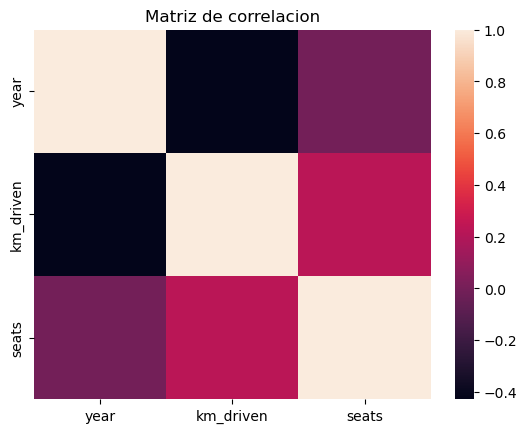

In [58]:
sns.heatmap(corr)
plt.title("Matriz de correlacion")
plt.show()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=14)

In [75]:
tree = DecisionTreeClassifier()

In [76]:
arbol = tree.fit(X_train, y_train)

In [77]:
## plot_tree(arbol)

[Text(0.32491633191377506, 0.9871794871794872, 'x[0] <= 2012.5\ngini = 0.99\nsamples = 5534\nvalue = [1, 1, 1, 1, 1, 3, 1, 10, 2, 17, 2, 10, 1, 1\n8, 2, 9, 19, 1, 1, 1, 14, 1, 7, 1, 1, 16, 1\n3, 1, 12, 1, 1, 17, 1, 1, 1, 13, 2, 1, 33, 1\n1, 3, 2, 27, 1, 1, 12, 1, 1, 1, 44, 3, 2, 1\n20, 1, 2, 32, 1, 18, 1, 35, 1, 2, 1, 7, 4, 1\n76, 2, 1, 11, 1, 1, 2, 43, 18, 1, 2, 39, 1\n1, 23, 1, 42, 1, 17, 1, 2, 25, 2, 1, 13, 3\n1, 2, 94, 1, 10, 2, 37, 1, 1, 15, 4, 1, 57\n4, 1, 61, 36, 2, 15, 1, 1, 31, 2, 1, 12, 5\n1, 113, 2, 2, 1, 1, 10, 1, 1, 1, 32, 1, 2\n14, 1, 41, 1, 33, 1, 1, 1, 37, 2, 11, 2, 34\n1, 12, 1, 1, 162, 1, 8, 1, 37, 1, 1, 11, 3\n1, 1, 48, 2, 47, 1, 1, 3, 26, 13, 1, 2, 15\n1, 6, 2, 1, 136, 4, 1, 7, 1, 1, 35, 2, 1, 6\n2, 2, 20, 2, 1, 31, 2, 1, 1, 37, 2, 13, 1, 1\n1, 1, 31, 1, 1, 10, 3, 122, 1, 2, 2, 1, 1\n28, 7, 16, 2, 31, 2, 34, 1, 1, 1, 24, 2, 1\n1, 13, 2, 17, 15, 1, 1, 133, 2, 1, 1, 11, 3\n1, 24, 14, 3, 1, 1, 17, 2, 31, 2, 1, 32, 1\n2, 16, 1, 1, 1, 1, 14, 1, 7, 3, 121, 18, 22\n2, 9, 1

Error in callback <function flush_figures at 0x72bb498a37f0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [86]:
predicciones = arbol.predict(X_test)

In [79]:
predicciones

array([1050000,   60000,  352000, ..., 1150000,  350000,  350000])

In [80]:
## Matriz de confusion
matriz_confusion = pd.crosstab(y_test, predicciones, rownames=["Actual"], colnames=["Predicciones"])

In [81]:
print(matriz_confusion)

Predicciones  31000    35000    39000    40000    42000    45000    45957    \
Actual                                                                        
40000               0        0        0        1        0        0        0   
45000               1        0        0        0        0        1        0   
46000               0        0        0        0        0        1        0   
50000               0        1        0        0        0        0        0   
55000               0        0        0        0        1        0        0   
...               ...      ...      ...      ...      ...      ...      ...   
5500000             0        0        0        0        0        0        0   
5800000             0        0        0        0        0        0        0   
5850000             0        0        0        0        0        0        0   
5923000             0        0        0        0        0        0        0   
6000000             0        0        0        0    

In [82]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.13195615514333894

In [83]:
precision = precision_score(y_test, predicciones, average="weighted")
precision

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.14451079526677574

In [84]:
recall = recall_score(y_test, predicciones, average="weighted")
recall

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.13195615514333894

In [85]:
f1 = f1_score(y_test, predicciones, average="weighted")
f1

0.12560010933185303